# Compute lake area

### 0. Import libraries and load data

In [37]:
import os
import rasterio
from matplotlib import pyplot as plt

plt.style.use('seaborn-v0_8')

DATA_PATH = "../data/processed/"
GROUND_TRUTH_PATH = "../data/ground_truth/"

In [38]:
# load water index maps for one lake
water_index_map_names = os.listdir(DATA_PATH)
water_index_map_ =  rasterio.open(DATA_PATH + water_index_map_names[10])


In [39]:
# load ground truth maps for one lake
ground_truth_map_names = os.listdir(GROUND_TRUTH_PATH)
ground_truth_map_ =  rasterio.open(GROUND_TRUTH_PATH + ground_truth_map_names[200])


### 1. Analyze the data

In [40]:
def analyze_tif_file(tif_file):
    # compute the distances covered by this map
    latitudinal_distance = tif_file.bounds.right - tif_file.bounds.left
    longitudinal_distance = tif_file.bounds.top - tif_file.bounds.bottom

    # create a list with descriptions of the data properties
    data_descriptions = [
        f"The data has {tif_file.count} band(s).",
        f"The shape of the raster data is {tif_file.height} rows x {tif_file.width} columns.",
        f"The coordinate reference system is {tif_file.crs}. The bounds are relative to the origin of this crs.",
        f"The bounds of the data are: {tif_file.bounds}.",
        f"The map covers a latitudinal distance of {latitudinal_distance} and a longitudinal distance of {longitudinal_distance}.",
    ]

    # concatenate in a string the described data properties and display them
    print("\n".join(data_descriptions))

In [41]:
analyze_tif_file(water_index_map_)

The data has 1 band(s).
The shape of the raster data is 2541 rows x 1325 columns.
The coordinate reference system is EPSG:32655. The bounds are relative to the origin of this crs.
The bounds of the data are: BoundingBox(left=714555.0, bottom=-3898765.0, right=727805.0, top=-3873355.0).
The map covers a latitudinal distance of 13250.0 and a longitudinal distance of 25410.0.


In [42]:
analyze_tif_file(ground_truth_map_)

The data has 1 band(s).
The shape of the raster data is 840 rows x 515 columns.
The coordinate reference system is EPSG:4326. The bounds are relative to the origin of this crs.
The bounds of the data are: BoundingBox(left=149.3568635781492, bottom=-35.206233626041794, right=149.49565328954566, top=-34.97985817444368).
The map covers a latitudinal distance of 0.13878971139646978 and a longitudinal distance of 0.22637545159811623.


In [43]:
def plot_map(water_index_map, ground_truth_map):
    fig, ax = plt.subplots(1, 3) 
    fig.set_size_inches(10, 5)

    # plot the histogram of pixel-level water index
    ax[0].hist(water_index_map.flatten(), bins=100)
    ax[0].set_xlabel("Water index value")
    ax[0].set_ylabel("Count")
    ax[0].set_title(f"Histogram of the pixel-level water index")

    # plot the water index map
    ax[1].imshow(water_index_map)
    ax[1].set_title("Water index map")
    ax[1].grid(False)

    # plot the ground truth map
    ax[2].imshow(ground_truth_map)
    ax[2].set_title("Ground truth map")
    ax[2].grid(False)

    plt.tight_layout()
    plt.show()

    # compute and display the minimum and maximum elevation values
    min_water_index = str(round(water_index_map.min(), 2))
    max_water_index = str(round(water_index_map.max(), 2))

    print(f"The minimum and maximum values of the water index are {min_water_index} and {max_water_index}.")

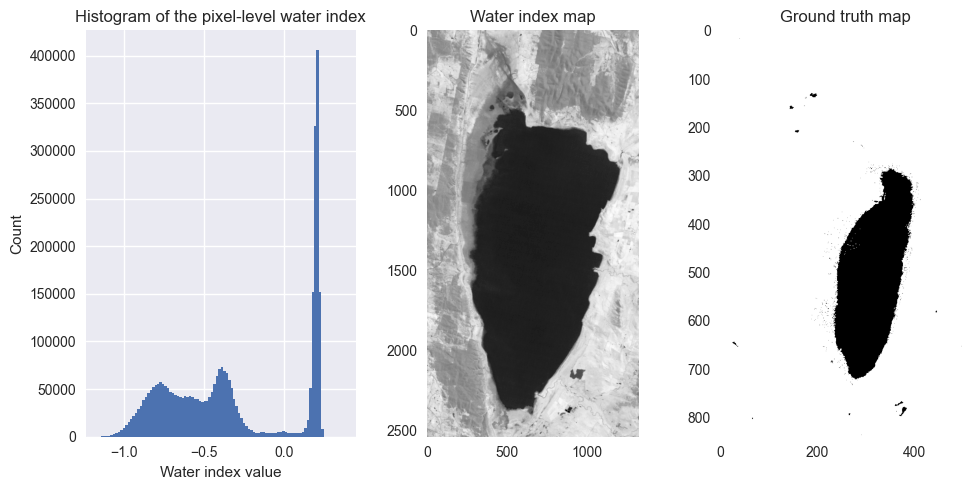

The minimum and maximum values of the water index are -1.16 and 0.37.


In [44]:
# extract the band from the water index
water_index_map = water_index_map_.read(1)

# extract the band from the ground truth
ground_truth_map = ground_truth_map_.read(1)

plot_map(water_index_map, ground_truth_map)

### 2. Detect the lake

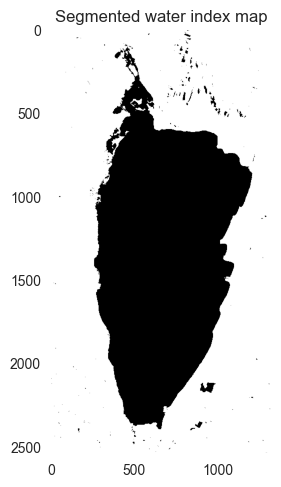

In [45]:
# segment the map and plot it
segmented_water_index_map = water_index_map > -0.25

fig, ax = plt.subplots(1, 1) 

ax.imshow(segmented_water_index_map)
ax.set_title("Segmented water index map")
ax.grid(False)

In [47]:
# TODO: find the best threshold that maximizes the accuracy / f1 score metric for the dection of one lake
# TODO: visualize the evolution of the ground truth (use a library that can be integrated with streamlit)
# TODO: leave aside other water bodies => compute the convex hull, but treat cases when there remain separated areas with water